D212 - Data Mining II

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load medical_clean CSV
df=pd.read_csv('C:/Users/Kmoik WGU/Desktop/D212/medical_clean.csv')

In [3]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [5]:
#create dataset of numeric columns only
num_df=df.select_dtypes('number')
num_df.columns

Index(['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age',
       'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [6]:
num_df.shape

(10000, 23)

In [7]:
#drop non-continuous numeric columns
cont_var=num_df.drop(['Zip', 'Children', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1)

In [8]:
cont_var.shape

(10000, 13)

In [9]:
#search for duplicates
print(cont_var.duplicated().value_counts())

False    10000
Name: count, dtype: int64


In [10]:
#check for null values - even though view of data indicates no nulls
cont_var.isnull().sum()

CaseOrder             0
Lat                   0
Lng                   0
Population            0
Age                   0
Income                0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Initial_days          0
TotalCharge           0
Additional_charges    0
dtype: int64

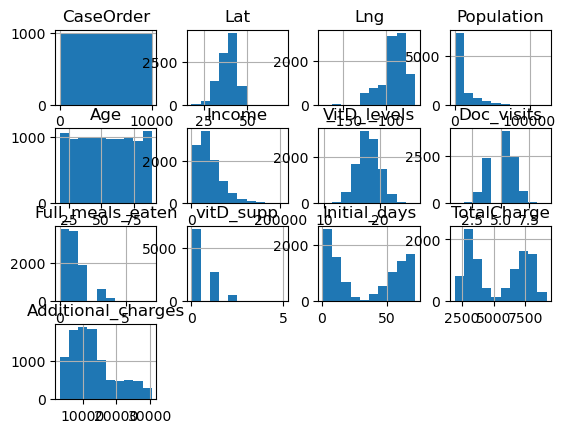

In [11]:
cont_var.hist()
plt.show()

In [12]:
#normalize data
scaler = StandardScaler()
scaler.fit(cont_var)
scaled_data_array = scaler.transform(cont_var)
scaled_data = pd.DataFrame(scaled_data_array, columns = cont_var.columns)
scaled_data.head()

,CaseOrder,Lat,Lng,Population,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
0,-1.731878,-0.814668,0.297134,-0.473168,-0.024795,1.615914,0.583603,0.944647,-0.993387,-0.634713,-0.907310,-0.727185,0.765005
1,-1.731531,-1.463305,0.395522,0.090242,-0.121706,0.221443,0.483901,-0.967981,0.990609,0.956445,-0.734595,-0.513228,0.715114
2,-1.731185,0.886966,-0.354788,0.482983,-0.024795,-0.915870,0.046227,-0.967981,-0.001389,-0.634713,-1.128292,-1.319983,0.698635
3,-1.730838,0.952530,-0.149403,-0.526393,1.186592,-0.026263,-0.687811,-0.967981,-0.001389,-0.634713,-1.244503,-1.460517,0.009004
4,-1.730492,-0.213252,0.943984,-0.315586,-1.526914,-1.377325,-0.260366,-0.011667,-0.993387,2.547602,-1.261991,-1.467285,-1.408991


In [13]:
#save to CSV
scaled_data.to_csv('C:/Users/Kmoik WGU/Desktop/KMoikD212_scaled.csv', index=False, header=True)

In [14]:
#PCA
pca=PCA()
pca.fit(scaled_data)
components=pca.components_
print(components)

[[ 5.51951159e-01 -1.08029752e-02 -1.02569910e-02  1.64121504e-02
   1.94292592e-02 -1.36865514e-02 -4.77552363e-03 -5.26894761e-03
  -1.69093571e-02  1.90226099e-02  5.89638741e-01  5.87822817e-01
   1.96460688e-02]
 [-2.40659168e-02 -2.08488757e-03  9.09731084e-03 -2.47054575e-02
   7.05780789e-01 -2.14629662e-02  1.99032972e-02  1.45294276e-02
   2.91867452e-02  1.73474063e-02 -1.70804245e-02 -6.30350226e-03
   7.05722795e-01]
 [-1.38830778e-02 -7.15750424e-01  2.72066713e-01  6.28571661e-01
   9.50273974e-03  7.63115334e-02 -1.85286431e-02  1.66237952e-02
  -1.03458781e-01  2.95594964e-02 -8.95837924e-03 -6.81327330e-03
   1.21816364e-02]
 [-2.06757077e-04  1.21905247e-01 -1.53346108e-01  2.14675276e-02
   2.01341124e-02  3.81910237e-01 -4.90902247e-01  1.56598106e-01
  -5.85889881e-01  4.53248056e-01 -1.23391479e-02 -1.49386950e-02
   1.78386628e-02]
 [-5.05677716e-03  6.14605973e-02 -7.59954690e-01  4.07843395e-01
  -6.76565780e-03  1.32020208e-01  3.31245936e-01  3.11219354e-01


In [15]:
#loadings
loadings=pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13'], index=scaled_data.columns).T
loadings

,CaseOrder,Lat,Lng,Population,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
PC1,0.551951,-0.010803,-0.010257,0.016412,0.019429,-0.013687,-0.004776,-0.005269,-0.016909,0.019023,0.589639,0.587823,0.019646
PC2,-0.024066,-0.002085,0.009097,-0.024705,0.705781,-0.021463,0.019903,0.014529,0.029187,0.017347,-0.017080,-0.006304,0.705723
PC3,-0.013883,-0.715750,0.272067,0.628572,0.009503,0.076312,-0.018529,0.016624,-0.103459,0.029559,-0.008958,-0.006813,0.012182
PC4,-0.000207,0.121905,-0.153346,0.021468,0.020134,0.381910,-0.490902,0.156598,-0.585890,0.453248,-0.012339,-0.014939,0.017839
PC5,-0.005057,0.061461,-0.759955,0.407843,-0.006766,0.132020,0.331246,0.311219,0.159250,0.052532,-0.004762,-0.002705,0.011098
PC6,0.007919,-0.001372,0.381060,-0.211083,-0.008513,0.391108,0.251168,0.761247,0.060242,-0.101571,0.014086,0.014688,-0.013906
PC7,-0.005051,0.031040,0.146965,-0.009635,-0.018798,-0.594139,0.368104,0.207212,-0.175999,0.643116,-0.013511,-0.011699,-0.025191
PC8,0.003037,-0.064760,0.097235,-0.106764,-0.013464,0.490591,0.167036,-0.347308,0.494793,0.583643,0.002880,0.003504,-0.008962
PC9,0.004301,-0.043851,-0.025518,0.054937,-0.017370,-0.283627,-0.649583,0.363136,0.578342,0.159044,-0.002387,-0.000790,-0.006034
PC10,-0.010636,0.679525,0.384358,0.614611,-0.001474,0.055960,-0.003755,-0.056365,0.074009,-0.018202,0.007075,0.007781,0.020276


In [23]:
#selecting PCs
covariance_matrix=np.dot(scaled_data.T, scaled_data) / scaled_data.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(covariance_matrix, eigenvector)) for eigenvector in pca.components_]
covariance_matrix

array([[ 1.00000000e+00, -9.58442000e-03, -1.55778102e-02,
         8.74561549e-03,  1.62210297e-03, -1.54507385e-02,
        -9.98662660e-03, -4.85562241e-03, -2.02354453e-02,
         2.41535278e-02,  8.31361382e-01,  8.21363547e-01,
         1.97130196e-03],
       [-9.58442000e-03,  1.00000000e+00, -1.12347681e-01,
        -2.07571864e-01, -7.26964164e-03, -1.93691115e-02,
         1.49341976e-03,  8.37963416e-03,  3.40068972e-03,
         1.28546987e-03, -8.82047689e-03, -1.07586076e-02,
        -2.28269517e-03],
       [-1.55778102e-02, -1.12347681e-01,  1.00000000e+00,
        -3.19785705e-02,  7.49284047e-03, -6.66509086e-03,
        -6.38920078e-03,  7.53892608e-04, -1.42307866e-02,
        -1.96100786e-03, -9.29233922e-03, -8.83018484e-03,
         7.93854596e-05],
       [ 8.74561549e-03, -2.07571864e-01, -3.19785705e-02,
         1.00000000e+00, -1.89866388e-02,  5.42647565e-03,
         2.65137050e-03,  1.26459611e-02, -2.56077104e-02,
         9.78090015e-03,  1.74692010e

In [17]:
#list eigenvalue values using code from WGU course materials.
eigenvalues

[2.7657043966540744,
 1.71838243363168,
 1.2270786693274454,
 1.0379682758171795,
 1.032871786017025,
 1.0056675288541357,
 0.9999544390986128,
 0.9763307637982189,
 0.9696823817326784,
 0.7466304389966195,
 0.28337517655726896,
 0.22480250300402743,
 0.011551206511033139]

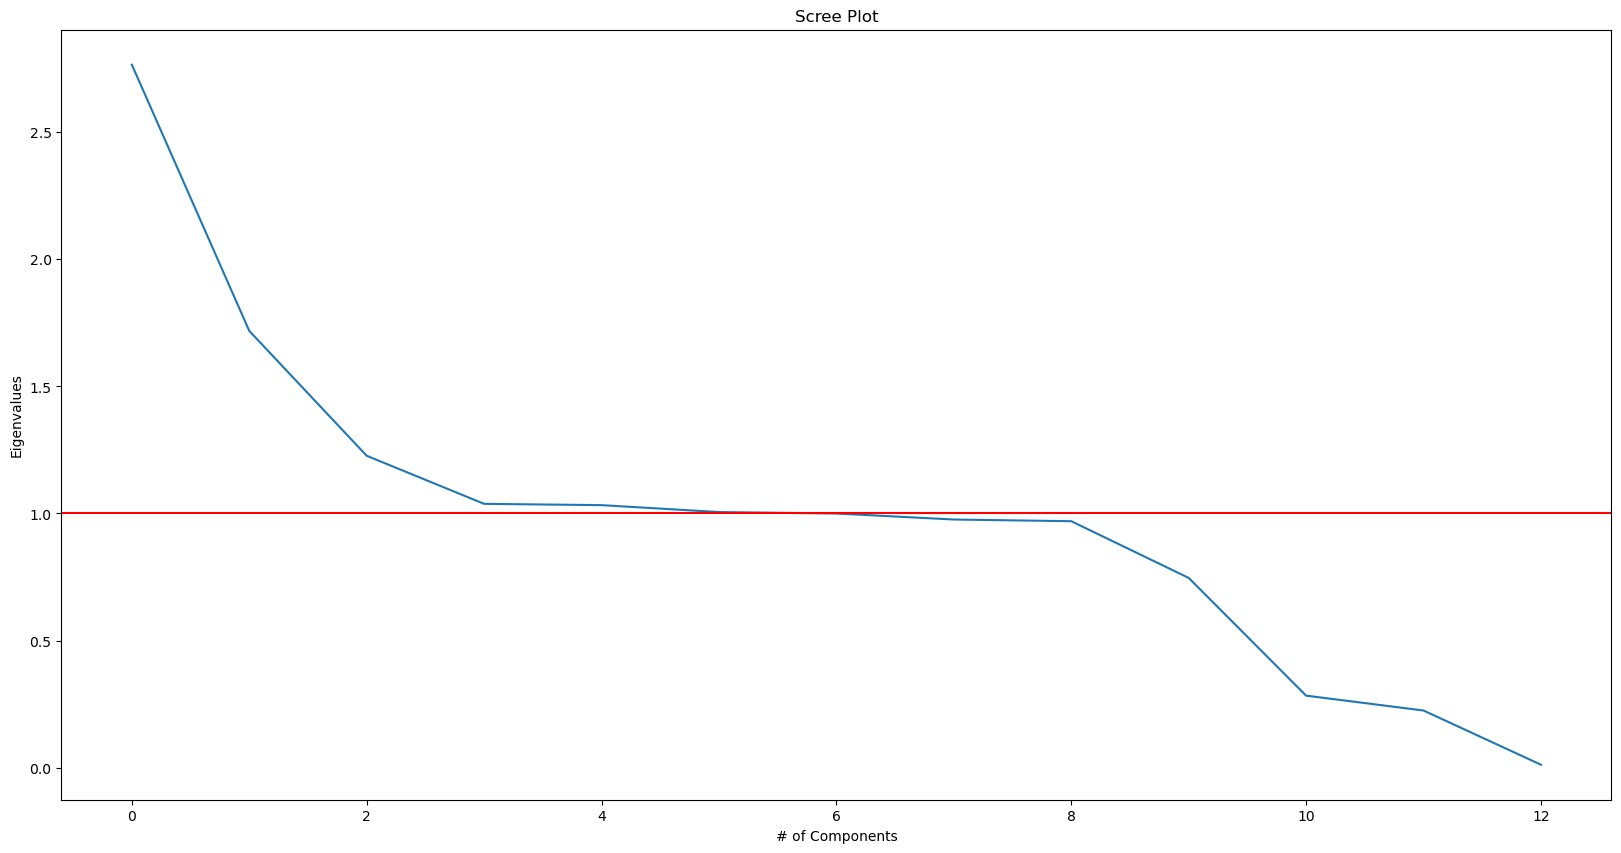

In [18]:
#Scree plot of Eigenvalues
plt.figure(figsize = [20,10])
plt.plot(eigenvalues)
plt.title('Scree Plot')
plt.xlabel('# of Components')
plt.ylabel('Eigenvalues')
plt.axhline(y=1, color='red')
plt.show()

In [19]:
#explained variance
exp_var=pca.explained_variance_ratio_
exp_var

array([0.21274649, 0.13218326, 0.09439067, 0.07984371, 0.07945168,
       0.07735904, 0.07691957, 0.07510237, 0.07459095, 0.05743311,
       0.02179809, 0.0172925 , 0.00088855])

In [20]:
#captured variance for each component
captured_variance=pca.explained_variance_ratio_*100
for i, var in enumerate(captured_variance): print(f"Principal Component {i+1}: {var:.2f}%")

Principal Component 1: 21.27%
Principal Component 2: 13.22%
Principal Component 3: 9.44%
Principal Component 4: 7.98%
Principal Component 5: 7.95%
Principal Component 6: 7.74%
Principal Component 7: 7.69%
Principal Component 8: 7.51%
Principal Component 9: 7.46%
Principal Component 10: 5.74%
Principal Component 11: 2.18%
Principal Component 12: 1.73%
Principal Component 13: 0.09%


In [21]:
#calculate explained variance
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))


 Total Variance Explained: 100.0
